In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.layers import Dense,Input,LSTM,GlobalMaxPooling1D,Embedding,MaxPooling1D,Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
!wget https://lazyprogrammer.me/course_files/spam.csv

--2022-09-14 17:19:54--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv.1’

spam.csv.1          100%[===================>] 491.86K   415KB/s    in 1.2s    

2022-09-14 17:19:56 (415 KB/s) - ‘spam.csv.1’ saved [503663/503663]



In [4]:
df = pd.read_csv("spam.csv",encoding='ISO-8859-1')
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df.columns=['target','data']
df['encoded_target']=df['target'].map({'ham':0,'spam':1})
Y=df['encoded_target'].values

df.head()

,target,data,encoded_target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [5]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df['data'],Y,test_size=0.33)

In [6]:
MAX_VOCAB_SIZE=20000

tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE) # utile per evitare le parole rare o mispelling, et similia
tokenizer.fit_on_texts(x_train) # basta solo questa fit perché si suppone ci siano le stesse parole che nel test
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq=tokenizer.texts_to_sequences(x_test)

In [7]:
T=189
x_train_data = pad_sequences(x_train_seq,maxlen=T)
x_test_data=pad_sequences(x_test_seq,maxlen=T)

In [8]:
V=len(tokenizer.word_index)
V # unique token

7015

In [15]:
D=20

M=15

i = Input(shape=(T,))
x = Embedding(V+1,D)(i) # output TxD
x=Conv1D(32,3,activation='relu')(x) # output T' x M
x=MaxPooling1D(3)(x)
Conv1D(64,3,activation='relu')(x) # output T2 x M2
x=MaxPooling1D(3)(x)
Conv1D(128,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x) # output M3
x=Dense(1,activation='sigmoid')(x)


model=Model(i,x)

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

r = model.fit(x_train_data,y_train,
              validation_data=(x_test_data,y_test),
              epochs=5
              )

Epoch 1/5
117/117 [==============================] - 3s 16ms/step - loss: 0.4840 - accuracy: 0.8497 - val_loss: 0.3774 - val_accuracy: 0.8592
Epoch 2/5
117/117 [==============================] - 2s 14ms/step - loss: 0.2724 - accuracy: 0.8853 - val_loss: 0.1975 - val_accuracy: 0.9445
Epoch 3/5
117/117 [==============================] - 2s 14ms/step - loss: 0.1170 - accuracy: 0.9654 - val_loss: 0.1255 - val_accuracy: 0.9608
Epoch 4/5
117/117 [==============================] - 2s 13ms/step - loss: 0.0728 - accuracy: 0.9796 - val_loss: 0.1064 - val_accuracy: 0.9668
Epoch 5/5
117/117 [==============================] - 2s 14ms/step - loss: 0.0531 - accuracy: 0.9874 - val_loss: 0.1034 - val_accuracy: 0.9695


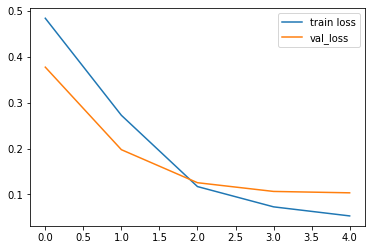

In [16]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],
label='val_loss')
plt.legend()

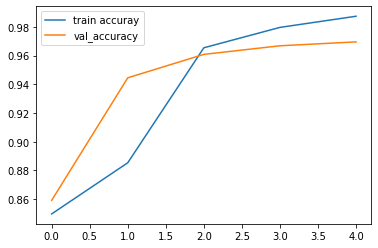

In [17]:
plt.plot(r.history['accuracy'],label='train accuray')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [20]:
tokenizer.index_word

{1: 'i',
 2: 'to',
 3: 'you',
 4: 'a',
 5: 'the',
 6: 'u',
 7: 'and',
 8: 'in',
 9: 'is',
 10: 'me',
 11: 'my',
 12: 'for',
 13: 'your',
 14: 'it',
 15: 'of',
 16: 'call',
 17: 'on',
 18: 'have',
 19: '2',
 20: 'are',
 21: 'that',
 22: 'now',
 23: 'so',
 24: 'not',
 25: 'do',
 26: 'but',
 27: 'can',
 28: "i'm",
 29: 'or',
 30: 'get',
 31: 'at',
 32: 'be',
 33: 'just',
 34: 'if',
 35: 'ur',
 36: 'will',
 37: 'with',
 38: 'no',
 39: 'this',
 40: 'gt',
 41: 'we',
 42: 'lt',
 43: 'up',
 44: 'how',
 45: 'when',
 46: '4',
 47: 'go',
 48: 'ok',
 49: 'out',
 50: 'free',
 51: 'what',
 52: 'from',
 53: 'got',
 54: 'all',
 55: 'know',
 56: 'good',
 57: 'then',
 58: 'come',
 59: 'was',
 60: 'like',
 61: 'am',
 62: 'time',
 63: 'send',
 64: 'love',
 65: 'its',
 66: 'text',
 67: 'day',
 68: 'want',
 69: 'only',
 70: 'there',
 71: 'stop',
 72: 'he',
 73: 'txt',
 74: 'going',
 75: 'one',
 76: 'as',
 77: 'need',
 78: 'about',
 79: 'sorry',
 80: 'da',
 81: 'lor',
 82: 'see',
 83: 'k',
 84: "i'll",
 85: 

In [29]:
def convert(encoded):
  sentence=""
  for i in encoded:
    if i==0: 
      continue
    else:
      sentence+=(tokenizer.index_word[i]+" ")
  return sentence

In [30]:
p_test=model.predict(x_test_data).argmax(axis=1)
misclassifies_idx=np.where(p_test !=y_test)[0]
i = np.random.choice(misclassifies_idx)
print(convert(x_test_data[i]))

print("True label: %s Predicted %s" % (y_test[i],p_test[i]))

21 f is inviting you to be her friend reply yes or no see her www sms ac u stop send stop frnd to 62468 
True label: 1 Predicted 0
